<a href="https://colab.research.google.com/github/parthatom/HeartDiseaseClassification/blob/master/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
!unzip /content/drive/"My Drive"/Data/Heart_Disease_UCI/heart-disease-uci.zip -d data

Archive:  /content/drive/My Drive/Data/Heart_Disease_UCI/heart-disease-uci.zip
  inflating: data/heart.csv          


In [0]:
import torch
import torchvision
import sys
import os
from pathlib import Path
import sklearn
import numpy as np
import pandas as pd

In [0]:
from sklearn import model_selection

In [0]:
data_path = Path('/','content','data')

In [18]:
df_train = pd.read_csv(os.path.join(data_path,"heart.csv"))
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df_train['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
pos = df_train[df_train['target']==1]
total_male_pos = len(pos[pos['sex']==1])
neg = df_train[df_train['target']==0]
total_male_neg = len(neg[neg['sex']==1])
print(total_male_neg, total_male_pos)
pos = df_train[df_train['target']==1]
total_female_pos = len(pos[pos['sex']==0])
neg = df_train[df_train['target']==0]
total_female_neg = len(neg[neg['sex']==0])
print(total_female_neg, total_female_pos)

114 93
24 72


In [0]:
df = df_train.copy()
df = df.drop(['target'], axis = 1)

In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [0]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
      if(feature_name == 'sex'):
        pass
      else:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
df = normalize(df)

In [55]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df,df_train['target'].values, test_size = 0.1, shuffle = True, random_state = 42)

In [57]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
284,0.666667,1,0.0,0.433962,0.184932,0.0,0.0,0.511450,1.0,0.306452,1.0,0.25,1.000000
198,0.687500,1,0.0,0.245283,0.321918,0.0,0.5,0.213740,1.0,0.290323,0.5,0.50,1.000000
42,0.333333,1,0.0,0.094340,0.187215,0.0,0.0,0.587786,1.0,0.483871,0.5,0.00,0.666667
17,0.770833,0,1.0,0.528302,0.228311,0.0,0.5,0.328244,0.0,0.419355,0.0,0.00,0.666667
168,0.708333,1,0.0,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,0.5,0.25,1.000000


In [58]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.528646,0.680147,0.324755,0.346941,0.273654,0.147059,0.270221,0.605607,0.323529,0.168050,0.707721,0.183824,0.769608
std,0.190133,0.467279,0.340525,0.157322,0.117300,0.354817,0.264008,0.168366,0.468685,0.186033,0.303812,0.259924,0.204559
min,0.000000,0.000000,0.000000,0.000000,0.011416,0.000000,0.000000,0.129771,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390625,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.511450,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.259132,0.000000,0.500000,0.633588,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.337900,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,0.924528,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_train.iloc[0].values

array([0.66666667, 1.        , 0.        , 0.43396226, 0.18493151,
       0.        , 0.        , 0.51145038, 1.        , 0.30645161,
       1.        , 0.25      , 1.        ])

In [69]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state = 42)
kmeans = model.fit(X_train)
y_pred_train = kmeans.labels_
y_pred_test = kmeans.predict(X_test)
train_accuracy = np.mean((y_pred_train == y_train).astype('float32'))
test_accuracy = np.mean((y_pred_test == y_test).astype('float32'))
print(f'train accuracy {train_accuracy*100:.3f}')
print(f'test accuracy {test_accuracy*100:.3f}')

train accuracy 72.059
test accuracy 70.968


In [65]:
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [0]:
transform_train = model.transform(X_train)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['y', 'r']

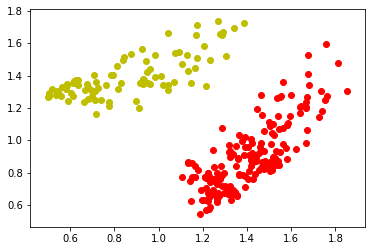

In [75]:
for i in range(len(transform_train)):
  plt.scatter(transform_train[i][0], transform_train[i][1], c=colors[y_pred_train[i]])
plt.show()

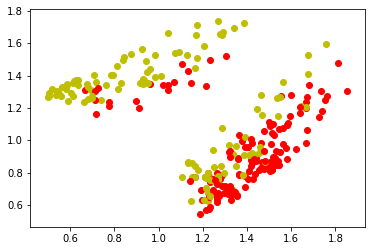

In [76]:
for i in range(len(transform_train)):
  plt.scatter(transform_train[i][0], transform_train[i][1], c=colors[y_train[i]])
plt.show()

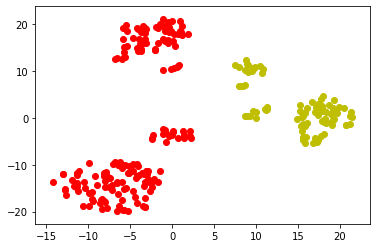

In [80]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42).fit_transform(X_train)
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_pred_train[i]])
plt.show()

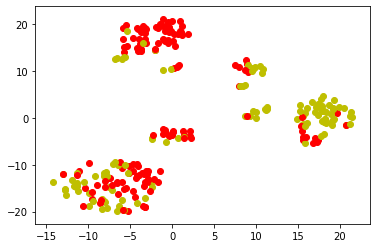

In [79]:
for i in range(len(transform_train)):
  plt.scatter(tsne[i][0], tsne[i][1], c=colors[y_train[i]])
plt.show()